In [1]:
import os
import glob
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
data_path = os.path.join('data', 'motion_data', 'files_motions_589')
all_files = glob.glob(data_path+'/**/*[0-9].xml', recursive=True)
for files in all_files: 
    print(files)

data/motion_data/files_motions_589/pour02.xml
data/motion_data/files_motions_589/pour04.xml
data/motion_data/files_motions_589/pour03.xml
data/motion_data/files_motions_589/pour01.xml
data/motion_data/files_motions_589/pour05.xml
data/motion_data/files_motions_589/pour06.xml


In [3]:
motion_data_tree = ET.parse(all_files[0])
motion_demo_root = motion_data_tree.getroot()
print("Root: ",motion_demo_root.tag)

motion_data_frame = {}
joint_order = []
for i, child in enumerate(motion_demo_root):
    print(child.tag, child.attrib)
    # For Motions
    motion_data_frame['name'] = child.attrib['name']
    motion_data_frame[i] = []
    for gchild in child:
        if gchild.tag=='JointOrder':
            for ggchild in gchild:
                joint_order.append(ggchild.attrib['name'])
        if gchild.tag == 'ModelProcessorConfig':
            height = float(gchild[0].text)

# print("Joint Order: ", joint_order)
RSx_id = joint_order.index("RSx_joint")
RSy_id = joint_order.index("RSy_joint")
RSz_id = joint_order.index("RSz_joint")
REx_id = joint_order.index("REx_joint")
REz_id = joint_order.index("REz_joint")
RWx_id = joint_order.index("RWx_joint")
RWy_id = joint_order.index("RWy_joint")

LSx_id = joint_order.index("LSx_joint")
LSy_id = joint_order.index("LSy_joint")
LSz_id = joint_order.index("LSz_joint")
LEx_id = joint_order.index("LEx_joint")
LEz_id = joint_order.index("LEz_joint")
LWx_id = joint_order.index("LWx_joint")
LWy_id = joint_order.index("LWy_joint")

Root:  MMM
Motion {'name': 'subject_id_551'}
Motion {'name': 'object_id_558'}
Motion {'name': 'object_id_564'}
Motion {'name': 'object_id_518'}


In [4]:
print(len(joint_order))
print(height)

44
1.7


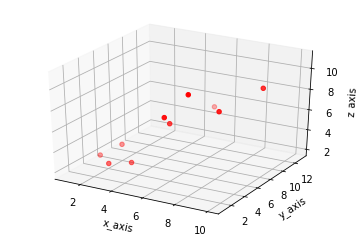

In [5]:
# example 3d plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [1,2,3,4,5,6,7,8,9,10]
y = [5,6,2,3,13,4,1,2,4,8]
z = [2,3,3,3,5,7,9,11,9,10]

ax.scatter(x, y, z, c='r', marker='o') # scatter plot

ax.set_xlabel('x_axis')
ax.set_ylabel('y_axis')
ax.set_zlabel('z_axis')

plt.show()

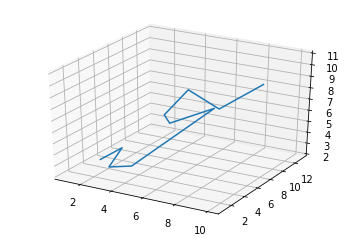

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = [1,2,3,4,5,6,7,8,9,10],[5,6,2,3,13,4,1,2,4,8],[2,3,3,3,5,7,9,11,9,10]
ax.plot(X, Y, Z, label='parametric curve')

plt.show()

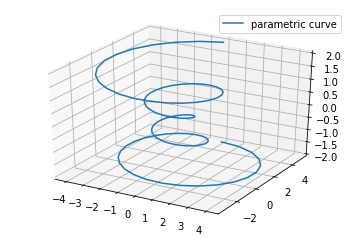

In [7]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

In [8]:
class MMMDemos(object):
    """A class to store MMM action categories"""
    def __init__(self, files):
        super(MMMDemos, self).__init__()
        self.samples = []
        for file in files:
            print("\nDemonstration: ", file)
            self.samples.append(MMMDataFrame(file))
        
        
class MMMDataFrame(object):
    """
    A class for MMM extracted data frame, 
    in order to carry out analysis on the data contained
    Needs to import xml.etree.ElementTree as ET for xml dependency
    """
    def __init__(self, xml_file, name=None):
        super(MMMDataFrame, self).__init__()
        if name:
            self.name = name
        else:
            self.name = xml_file
        data_tree = ET.parse(xml_file)
        data_root = data_tree.getroot()
        
        # a list to contain all subjects (and objects) in the xml file
        self.subjects = []
        for i, child in enumerate(data_root):
            print(child.tag, child.attrib)
            
            # create subject
            motion_subject = MMMSubject(child.attrib['name'])
            
            # properties
            time_steps = []
            root_positions = []
            root_rotations = []
            joint_positions = []
            
            for gchild in child:
                if gchild.tag=='JointOrder':
                    for ggchild in gchild:
                        joint_order.append(ggchild.attrib['name'])
                if gchild.tag=='MotionFrames':
                    for ggchild in gchild:
                        if ggchild.tag=='MotionFrame':
                            # time_steps
                            time_steps.append([float(x) for x in list(ggchild[0].text.split(' '))][0])
                            # root positions
                            root_positions.append([float(x) for x in list(ggchild[1].text.split(' '))])
                            # root_roations
                            root_rotations.append([float(x) for x in list(ggchild[2].text.split(' '))])
                            try:
                                # joint positions
                                joint_positions.append([float(x) for x in list(ggchild[3].text.split(' '))[:-1]])
                            except IndexError:
                                pass        
            motion_subject.properties['time_steps'] = time_steps
            motion_subject.properties['root_positions'] = root_positions
            motion_subject.properties['root_rotations'] = root_rotations
            motion_subject.properties['joint_positions'] = joint_positions
            self.subjects.append(motion_subject)

class MMMSubject(object):
    """ manage data in MMM subjects """
    def __init__(self, name):
        super(MMMSubject, self).__init__()
        
        # name is given to the subject at initiation
        self.name = name
        
        # create an empty dictionary of properties for the subject
        self.properties = {}

In [39]:
motion_demos = MMMDemos(all_files)


Demonstration:  data/motion_data/files_motions_589/pour02.xml
Motion {'name': 'subject_id_551'}
Motion {'name': 'object_id_558'}
Motion {'name': 'object_id_564'}
Motion {'name': 'object_id_518'}

Demonstration:  data/motion_data/files_motions_589/pour04.xml
Motion {'name': 'subject_id_551'}
Motion {'name': 'object_id_558'}
Motion {'name': 'object_id_564'}
Motion {'name': 'object_id_518'}

Demonstration:  data/motion_data/files_motions_589/pour03.xml
Motion {'name': 'subject_id_551'}
Motion {'name': 'object_id_558'}
Motion {'name': 'object_id_564'}
Motion {'name': 'object_id_518'}

Demonstration:  data/motion_data/files_motions_589/pour01.xml
Motion {'name': 'subject_id_551'}
Motion {'name': 'object_id_558'}
Motion {'name': 'object_id_564'}
Motion {'name': 'object_id_518'}

Demonstration:  data/motion_data/files_motions_589/pour05.xml
Motion {'name': 'subject_id_551'}
Motion {'name': 'object_id_558'}
Motion {'name': 'object_id_564'}
Motion {'name': 'object_id_518'}

Demonstration:  dat

In [101]:
# we want to extract only the arm informations
demo_samples = motion_demos.samples
# print(skip_index1, skip_index2)

# to access the time steps in a subject of an action demonstration
sample_joint_pose = demo_samples[0].subjects[0].properties['joint_positions'][100]

x_data, y_data, z_data = [], [], []

RSx = sample_joint_pose[RSx_id]
RSy = sample_joint_pose[RSy_id]
RSz = sample_joint_pose[RSz_id]

REx = sample_joint_pose[REx_id]
REz = sample_joint_pose[REz_id]

x_e = (RSx-REx)
z_e = (RSz-REz)

SE = height*0.188*3
y_e = math.sqrt(SE**2 - z_e**2 - x_e**2)
# REy = y_e+RSy
REy = 0

# print(RSy)
# print(REy)

RWx = sample_joint_pose[RWx_id]
RWy = sample_joint_pose[RWy_id]

x_w = RWx-REx
y_w = RWy-REy

EW = height*0.145*3
z_w = math.sqrt(EW**2 - y_w**2 - x_w**2)
# RWz = REz-z_w
RWz = 0


# LSx = sample_joint_pose[LSx_id]
# LSy = sample_joint_pose[LSy_id]
# LSz = sample_joint_pose[LSz_id]

# LEx = sample_joint_pose[LEx_id]
# LEz = sample_joint_pose[LEz_id]
# LEy = 0

# LWx = sample_joint_pose[LWx_id]
# LWy = sample_joint_pose[LWy_id]
# LWz = 0

In [102]:
# x_data = [RSx, REx, RWx, LSx, LEx, LWx]
x_data = [RSx, REx, RWx]
y_data = [RSy, REy, RWy]
# y_data = [RSy, REy, RWy, LSy, LEy, LWy]
z_data = [RSz, REz, RWz]
# z_data = [RSz, REz, RWz, LSz, LEz, LWz]

print(x_data, y_data, z_data)

[-0.16297, 0.636597, -0.0327494] [-0.284751, 0, 0.242281] [-0.0517871, 0.119616, 0]


In [103]:
# plot joint positions
fig = plt.figure()
aax = fig.gca(projection='3d')

# aax.scatter(x_data, y_data, z_data)
aax.plot(x_data, y_data, z_data)

aax.set_xlabel('x_axis')
aax.set_ylabel('y_axis')
aax.set_zlabel('z_axis')

# aax.legend()

# %matplotlib qt
plt.show()

In [143]:
# try to read c3d files
import c3d
cd3data_path = os.path.join('data', 'motion_data', 'files_motions_589')
all_files = glob.glob(cd3data_path+'/**/*[0-9].c3d', recursive=True)
for files in all_files: 
    print(files)

# read c3d file
reader = c3d.Reader(open(all_files[0], 'rb'))

# assess data in file
for i, points, analog in reader.read_frames():
#     print('frame {}: point {}, analog {}'.format(i, points.shape, analog.shape))
    print(points[20])
#     print(analog)

data/motion_data/files_motions_589/pour02.c3d
data/motion_data/files_motions_589/pour04.c3d
data/motion_data/files_motions_589/pour03.c3d
data/motion_data/files_motions_589/pour01.c3d
data/motion_data/files_motions_589/pour05.c3d
data/motion_data/files_motions_589/pour06.c3d
[  178.03675842   -19.43037605  1406.45361328     0.             0.        ]
[  177.98608398   -19.47540474  1406.45922852     0.             0.        ]
[  177.92108154   -19.52727509  1406.47241211     0.             0.        ]
[  177.84342957   -19.58177948  1406.49621582     0.             0.        ]
[  177.75511169   -19.63559532  1406.53308105     0.             0.        ]
[  177.65786743   -19.68816376  1406.58361816     0.             0.        ]
[  177.5526886    -19.74271774  1406.6463623      0.             0.        ]
[  177.43980408   -19.80580902  1406.71679688     0.             0.        ]
[  177.318573     -19.88529205  1406.79003906     0.             0.        ]
[  177.1880188    -19.98773003 

[ -593.32128906  -132.20120239  1397.43359375     0.             0.        ]
[ -594.03118896  -131.17547607  1398.06188965     0.             0.        ]
[ -594.77246094  -130.0831604   1398.71582031     0.             0.        ]
[ -595.55151367  -128.92913818  1399.3918457      0.             0.        ]
[ -596.37359619  -127.71884918  1400.08581543     0.             0.        ]
[ -597.24145508  -126.45864868  1400.79296875     0.             0.        ]
[ -598.15386963  -125.15586853  1401.50732422     0.             0.        ]
[ -599.10565186  -123.81829834  1402.22216797     0.             0.        ]
[ -600.08807373  -122.45327759  1402.93078613     0.             0.        ]
[ -601.0916748   -121.06695557  1403.62670898     0.             0.        ]
[ -602.10821533  -119.66383362  1404.30541992     0.             0.        ]
[ -603.13189697  -118.24638367  1404.96472168     0.             0.        ]
[ -604.15881348  -116.81471252  1405.60522461     0.             0.        ]

In [144]:
# reader.point_used
print("point labels: ", reader.point_labels)

point labels:  ['small_cup:sc_01               ', 'small_cup:sc_02               ', 'small_cup:sc_03               ', 'small_cup:sc_04               ', 'bottle:shampoo_01             ', 'bottle:shampoo_02             ', 'bottle:shampoo_03             ', 'bottle:shampoo_04             ', 'Table:table_1                 ', 'Table:table_2                 ', 'Table:table_3                 ', 'Table:table_4                 ', 'subjX:RPSI                    ', 'subjX:LPSI                    ', 'subjX:L3                      ', 'subjX:STRN                    ', 'subjX:T10                     ', 'subjX:C7                      ', 'subjX:CLAV                    ', 'subjX:RBAK                    ', 'subjX:LBAK                    ', 'subjX:LSHO                    ', 'subjX:LUPA                    ', 'subjX:LAEL                    ', 'subjX:LAOL                    ', 'subjX:LWTS                    ', 'subjX:LWPS                    ', 'subjX:LFRA                    ', 'subjX:LIFD                    '